In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import csv

%matplotlib inline  

In [22]:
x=[]
y=[]

with open('userdata.csv', 'rb') as csvf:
    reader = csv.reader(csvf, delimiter=',')
    headers = next(reader)
    for row in reader:
        try:
            x.append(float(row[5]))
            y.append(float(row[7]))
        except ValueError,e:
            print "error",e,"on line",row

In [23]:
data=[]
for i in range(0,34):
  data.append([x[i],y[i]])

In [41]:
dbscan = DBSCAN(random_state=111)

In [42]:
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=111)

In [43]:
dbscan.fit(data)

C:\Users\faye\Anaconda2\lib\site-packages\sklearn\cluster\dbscan_.py:106: DeprecationWarning: The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.
  category=DeprecationWarning)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=111)

In [55]:
dbscan.labels_

array([ 0,  0,  0, -1, -1, -1,  1, -1,  1,  1,  0,  1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1,  2,  2, -1,  0, -1, -1,  2,  2, -1, -1,  2, -1], dtype=int64)

In [63]:
pca = PCA(n_components=2).fit(data)

In [64]:
pca

PCA(copy=True, n_components=2, whiten=False)

In [65]:
pca_2d = pca.transform(data)

In [67]:
pca_2d.shape[0]

34L

In [ ]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
pl.title('DBSCAN finds 2 clusters and noise)
pl.show()

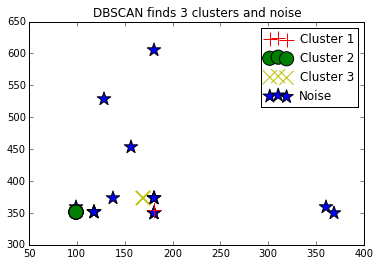

In [78]:
for i in range(0, 34):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(data[i][0],data[i][1],c='r',marker='+', s=200)
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(data[i][0],data[i][1],c='g',marker='o', s=200)
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(data[i][0],data[i][1],c='y',marker='x', s=200)
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(data[i][0],data[i][1],c='b',marker='*', s=200)

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2','Cluster 3','Noise'])
plt.title('DBSCAN finds 3 clusters and noise')
plt.show()